In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

data_mywork = pd.read_csv('mywork.csv')
data_topdev = pd.read_csv('topdev.csv')
frames = [data_mywork, data_topdev]
result = pd.concat(frames, sort=False)



In [2]:
result.columns

Index(['company', 'wage', 'skill', 'address', 'name', 'url'], dtype='object')

In [3]:
result

,company,wage,skill,address,name,url
0,Công ty vàng bạc đá quý Bảo Tín Minh Châu,8 triệu - 17 triệu,Chứng khoán - Vàng,Ha Noi,Nhân viên thiết kế 2D-3D (Chuyên thiết kế tran...,https://mywork.com.vn/tuyen-dung/viec-lam/1089...
1,Công Ty TNHH In Ấn May Mặc Thời Trang Hùng Thiên,7 triệu - 10 triệu,Kiến trúc - Thiết kế nội thất,Ho Chi Minh,Thiết kế đồ họa - thiết kế hoa văn in trên vải,https://mywork.com.vn/tuyen-dung/viec-lam/1206...
2,Công ty Cổ phần Trực tuyến GOSU,7 triệu - 10 triệu,Thiết kế đồ họa - Web,Thua Thien Hue,Nhân viên Thiết kế,https://mywork.com.vn/tuyen-dung/viec-lam/1223...
3,Công Ty TNHH King Car,Thương lượng,Marketing - PR,Ho Chi Minh,Nhân viên Thiết kế đồ họa (Graphic Designer),https://mywork.com.vn/tuyen-dung/viec-lam/1228...
4,CÔNG TY TNHH DV TM TẦM NHÌN CHIẾN LƯỢC,Thương lượng,Thiết kế - Mỹ thuật,Ho Chi Minh,[HCM] Designer - Lương Hấp Dẫn,https://mywork.com.vn/tuyen-dung/viec-lam/1055...
5,Trường Tiểu học Quốc tế Gateway Hải Phòng,7 triệu - 10 triệu,IT phần cứng/mạng,Hai Phong,Nhân viên IT,https://mywork.com.vn/tuyen-dung/viec-lam/1233...
6,CÔNG TY CỔ PHẦN CƠ KHÍ VIỆT TIN,6 triệu - 8 triệu,Kiến trúc - Thiết kế nội thất,Ho Chi Minh,Thiết Kế Đồ Họa Web,https://mywork.com.vn/tuyen-dung/viec-lam/1235...
7,Công ty TNHH Dành cho bé yêu,10 triệu - 12 triệu,Thiết kế đồ họa - Web,Ha Noi,Nhân viên Concept Artist,https://mywork.com.vn/tuyen-dung/viec-lam/1231...
8,Công Ty TNHH thương mại và dịch vụ GE Việt Nam,Thương lượng,IT phần mềm,Bac Ninh,Nhân Viên IT (Android Developers),https://mywork.com.vn/tuyen-dung/viec-lam/1223...
9,Công ty TNHH Nghệ Thuật Nam Hải,7 triệu - 10 triệu,Thiết kế - Mỹ thuật,Ho Chi Minh,Nhân Viên Vẽ Chuyển Động Nhân Vật Trong Phim H...,https://mywork.com.vn/tuyen-dung/viec-lam/1231...


In [4]:
# Tong hop du lieu 2 web
result.shape

(927, 6)

In [5]:
result.describe()

,company,wage,skill,address,name,url
count,908,908,908,907,908,908
unique,699,111,77,21,781,908
top,Tập đoàn CNTT Truyền thông Quảng cáo Việt Tiến...,Negotiable,PHP,Ho Chi Minh,Nhân viên thiết kế,https://topdev.vn/detail-jobs/hcm-back-end-dev...
freq,6,328,95,495,20,1


In [6]:
def getJobLocation():

    listJobLocation, countJobLocations = [], []
    job_locations = list(result['address'])
    listJobLocation, countJobLocations = [], []
    for job_location in job_locations:
        if type(job_location) is str:
            listJobLocation += job_location.split(', ')
        else:
            job_locations.remove(job_location)
    # 2 câu lệnh này có nghĩa chỉ lấy địa điểm không bị trùng vd như 'hà nội', 'hà nội' chỉ tính 'hà nội' trong list lịtobLocation
    getListLocations = list(set([getListLocation for getListLocation in listJobLocation if listJobLocation.count(getListLocation) >=1 ]))
    getListLocations.sort(reverse = False) # sắp xếp theo thứ tự anpha bêta
    
    # Vòng for này để đếm số lượng xuất hiện của địa điểm
    for getListLocation in getListLocations:
        countJobLocation = listJobLocation.count(getListLocation)
        countJobLocations.append(countJobLocation)
        
    return getListLocations, countJobLocations
        

In [7]:
nameJobLocation, countJobLocation = getJobLocation()

In [8]:
tableLocation = pd.DataFrame({'Name Location': nameJobLocation, 'Count Location': countJobLocation})
table_location_small = tableLocation[tableLocation['Count Location'] >= 4]

In [9]:
table_location_small 

,Count Location,Name Location
4,7,Binh Duong
5,23,Da Nang
8,357,Ha Noi
10,4,Hai Phong
11,492,Ho Chi Minh


#### <i>phan bo theo khu vuc cua tat ca 18 tinh thanh tren ca nuoc theo data</i>

Text(0.5,1,'Bieu do phan bo viec lam theo khu vuc tuyen dung')

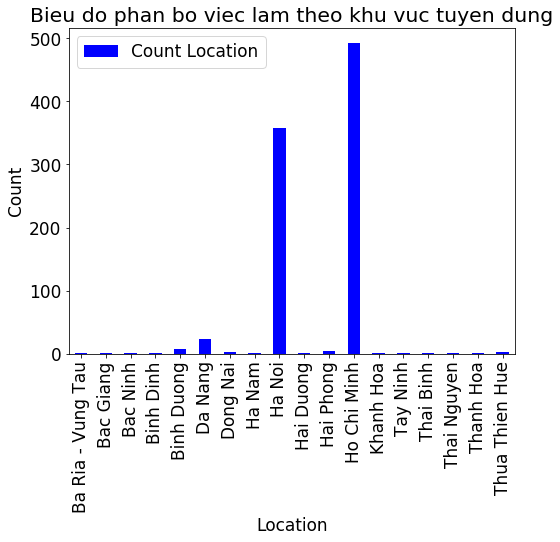

In [205]:

tableLocation.plot.bar(x = 'Name Location', color = 'blue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bieu do phan bo viec lam theo khu vuc tuyen dung')

#### phan bo cac tinh thanh co so luong job >= 4

Text(0.5,1,'Bieu do phan bo viec lam theo khu vuc tuyen dung')

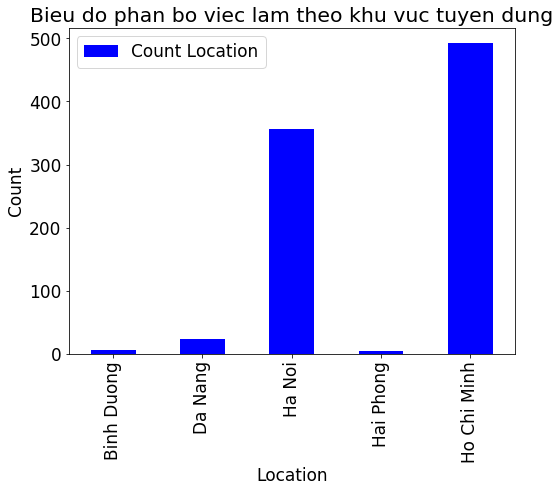

In [206]:
table_location_small.plot.bar(x = 'Name Location', color = 'blue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bieu do phan bo viec lam theo khu vuc tuyen dung')

#### Phan loai cong viec ( skill ) cua 2 web

In [153]:
type(list_skill[0])

str

In [15]:
import re

def language():
    list_skill = list(result['skill'])
    list_language, count_languages = [], []
    list_job_skill, count_job_skills = [], []

    for skill in list_skill:
        if type(skill) is str:
            skill_search = re.search("[-/ ]", skill)
            if skill_search == None:
                list_language.append(skill)

            else:
                list_job_skill.append(skill)
        else:
            list_skill.remove(skill)
                
    
    get_languages = list(set([get_language for get_language in list_language if list_language.count(get_language) >=1 ]))
    get_languages.sort(reverse = False)
    
    for get_language in get_languages:
        count_language = list_language.count(get_language)
        count_languages.append(count_language)

    
    get_list_job_skills = list(set([get_list_job_skill for get_list_job_skill in list_job_skill if list_job_skill.count(get_list_job_skill) >=1 ]))
    get_list_job_skills.sort(reverse = False)
    
    
    for get_list_job_skill in get_list_job_skills:
        count_job_skill = list_job_skill.count(get_list_job_skill)
        count_job_skills.append(count_job_skill)
    
    return get_languages, get_list_job_skills, count_language, count_job_skill

get_languages, get_list_job_skill,  count_languages, count_job_skills = language()




In [209]:
get_languages

['.NET',
 'ASP.NET',
 'Agile',
 'Android',
 'AngularJS',
 'C#',
 'C++',
 'CSS',
 'Game',
 'Games',
 'HTML',
 'HTML5',
 'J2EE',
 'Java',
 'JavaScript',
 'Linux',
 'Manager',
 'Mobile',
 'MySQL',
 'NodeJS',
 'OOP',
 'Oracle',
 'PHP',
 'Python',
 'QA',
 'QC',
 'ReactJS',
 'SQL',
 'Swift',
 'Tester',
 'Unity',
 'VueJS',
 'WordPress',
 'iOS']

In [187]:
get_list_job_skill

['Automation Test',
 'Back-End',
 'Big Data',
 'Biên tập/ Báo chí/ Truyền hình',
 'Bán hàng',
 'Bất động sản',
 'Chứng khoán - Vàng',
 'Công chức - Viên chức',
 'Công nghệ cao',
 'Cơ khí - Chế tạo',
 'Data Analytics',
 'Dệt may - Da giày',
 'Dịch vụ',
 'Front-End',
 'Full-Stack',
 'Game Artist',
 'Graphic Design',
 'Hành chính - Văn phòng',
 'IT phần cứng/mạng',
 'IT phần mềm',
 'In ấn - Xuất bản',
 'Kiến trúc - Thiết kế nội thất',
 'Kế toán - Kiểm toán',
 'Kỹ thuật',
 'Kỹ thuật ứng dụng',
 'Làm đẹp/ Thể lực/ Spa',
 'Lương cao',
 'Marketing - PR',
 'Mỹ phẩm - Trang sức',
 'Nghệ thuật - Điện ảnh',
 'Product Manager',
 'Project Manager',
 'React Native',
 'Ruby on Rails',
 'Sinh viên làm thêm',
 'System Admin',
 'Thiết kế - Mỹ thuật',
 'Thiết kế đồ họa - Web',
 'Thiết kế đồ họa – Web',
 'UI Design',
 'UX/UI Design',
 'Điện - Điện tử - Điện lạnh',
 'Điện tử viễn thông']

In [16]:
count_languages

11

In [17]:
count_job_skills

4

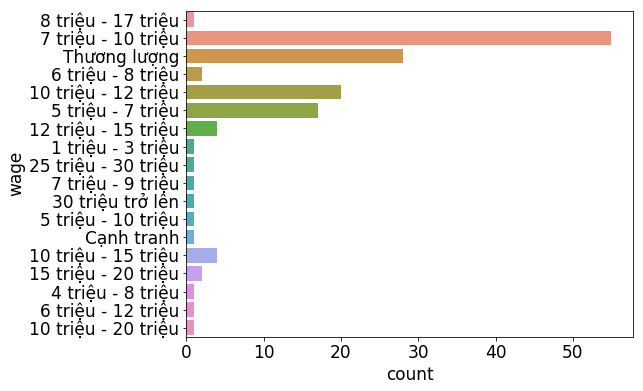

In [74]:
# 150 luong dau tien 2 web
sns.countplot(y=result.head(150)['wage'])

In [75]:
# 5 data dau tien cua topdev
data_topdev.head()

,name,address,skill,wage,company,url
0,(HN) QC Engineer (Tester),Ha Noi,QC,Negotiable,DigiTechLabs,https://topdev.vn/detail-jobs/hn-qc-engineer-d...
1,(HN) 10 Business Analyst/Tester,Ha Noi,Tester,"Up to $1,500",Thai Son Soft,https://topdev.vn/detail-jobs/hn-10-business-a...
2,"(HN) Tester (QA, QC)",Ha Noi,QA,Negotiable,Vietnam International Bank (VIB),https://topdev.vn/detail-jobs/hn-tester-vietna...
3,(HN) Automation Tester,Ha Noi,Tester,Negotiable,Fortna Vietnam,https://topdev.vn/detail-jobs/hn-automation-te...
4,(HN) Tester Webform,Ha Noi,Tester,Negotiable,Kloon,https://topdev.vn/detail-jobs/hn-tester-webfor...


In [76]:
# Du lieu tu topdev
data_topdev.describe()

,name,address,skill,wage,company,url
count,538,537,538,538,538,538
unique,481,6,48,74,408,538
top,(HCM) Graphic Designer,Ho Chi Minh,PHP,Negotiable,Vincere.io,https://topdev.vn/detail-jobs/hcm-front-end-de...
freq,6,320,95,328,4,1


In [ ]:
sns.countplot(x=result['skill'])

In [78]:
# thong ke data co skill la php cua topdev
skill_data_topdev = (result[result['skill'] == 'PHP']).describe()
skill_data_topdev

,address,company,name,skill,url,wage
count,95,95,95,95,95,95
unique,3,87,88,1,95,25
top,Ho Chi Minh,Công ty Cổ phần W&S,(HCM) Full-Stack Developer (PHP),PHP,https://topdev.vn/detail-jobs/02-php-developer...,Negotiable
freq,61,2,3,95,1,47


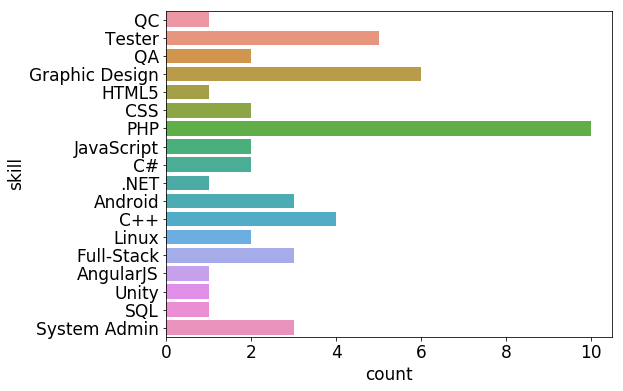

In [79]:
# thong ke 50 skill dau cua topdev
sns.countplot(y=data_topdev.head(50)['skill'])

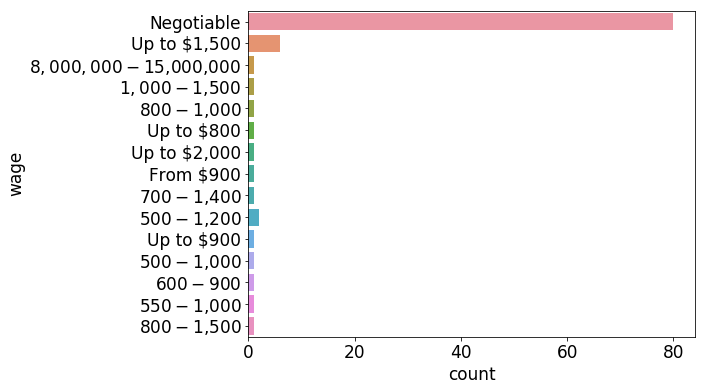

In [80]:
# thong ke 100 luong dau tien cua topdev
sns.countplot(y=data_topdev.head(100)['wage'])

In [81]:
# cac thong so chung cua topdev

In [82]:
data_topdev['wage'].describe()

count            538
unique            74
top       Negotiable
freq             328
Name: wage, dtype: object

In [83]:
data_topdev['skill'].describe()

count     538
unique     48
top       PHP
freq       95
Name: skill, dtype: object

In [84]:
data_topdev['address'].describe()

count             537
unique              6
top       Ho Chi Minh
freq              320
Name: address, dtype: object

In [85]:
data_topdev['company'].describe()

count            538
unique           408
top       Vincere.io
freq               4
Name: company, dtype: object

In [89]:
# khu vuc Ha Noi cua topdev
local_data_topdev = (result[result['address'] == 'Ha Noi'])
local_data_topdev.describe()

,address,company,name,skill,url,wage
count,350,350,350,350,350,350
unique,1,274,310,58,350,54
top,Ha Noi,Tập đoàn CNTT Truyền thông Quảng cáo Việt Tiến...,Nhân viên thiết kế,Thiết kế đồ họa - Web,https://mywork.com.vn/tuyen-dung/viec-lam/1224...,Negotiable
freq,350,6,9,35,1,126


In [90]:
local_data_topdev['skill']

0                  Chứng khoán - Vàng
7               Thiết kế đồ họa - Web
12                        IT phần mềm
13      Kiến trúc - Thiết kế nội thất
15              Thiết kế đồ họa - Web
16      Kiến trúc - Thiết kế nội thất
19                              Games
26      Kiến trúc - Thiết kế nội thất
29      Kiến trúc - Thiết kế nội thất
32                     Marketing - PR
35              Thiết kế đồ họa - Web
38              Thiết kế đồ họa - Web
39                Mỹ phẩm - Trang sức
48              Thiết kế đồ họa - Web
50              Thiết kế đồ họa - Web
52     Biên tập/ Báo chí/ Truyền hình
53                       Bất động sản
56      Kiến trúc - Thiết kế nội thất
57     Biên tập/ Báo chí/ Truyền hình
63              Thiết kế đồ họa - Web
64                      Công nghệ cao
75              Thiết kế đồ họa - Web
78                   In ấn - Xuất bản
79      Kiến trúc - Thiết kế nội thất
80              Thiết kế đồ họa - Web
82                  IT phần cứng/mạng
87      Kiến

In [87]:
# thong so skill tai khu vuc Ha Noi cua topdev
local_data_topdev['skill'].describe()

count                       350
unique                       58
top       Thiết kế đồ họa - Web
freq                         35
Name: skill, dtype: object

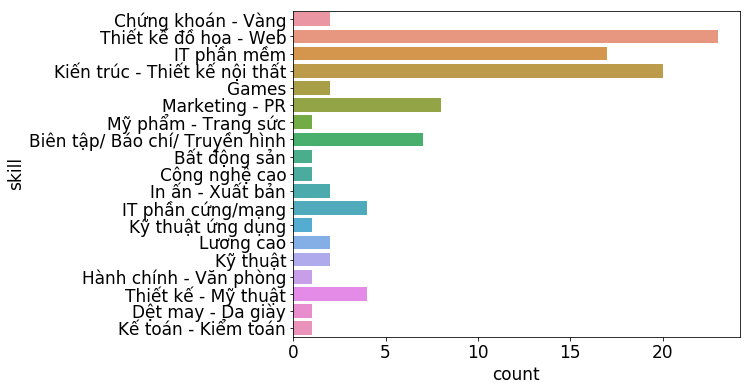

In [91]:
# thong ke 100 skill dau tien khu vuc Ha Noi cua topdev
sns.countplot(y=local_data_topdev.head(100)['skill'])

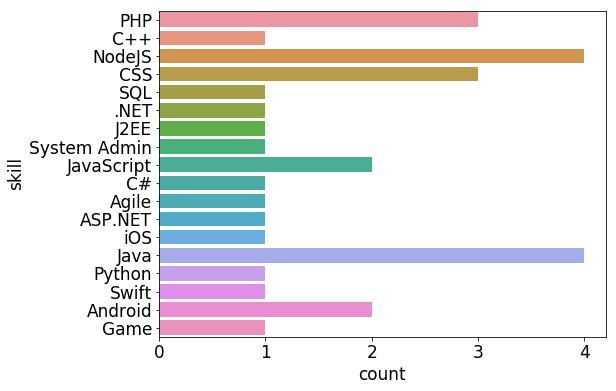

In [96]:
# thong ke 30 skill cuoi cung khu vuc Ha Noi cua topdev
sns.countplot(y=local_data_topdev.tail(30)['skill'])

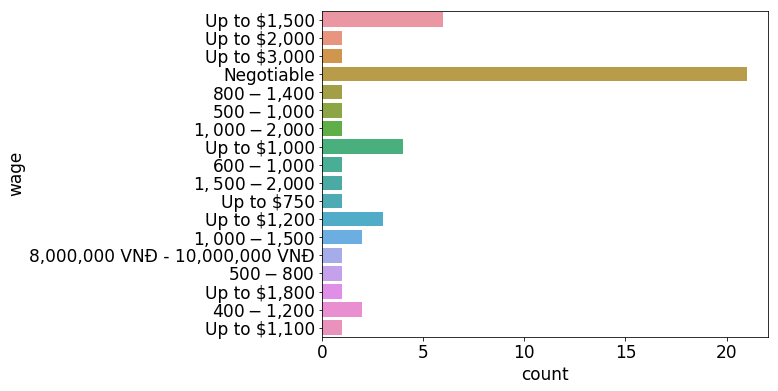

In [99]:
sns.countplot(y=local_data_topdev.tail(50)['wage'])

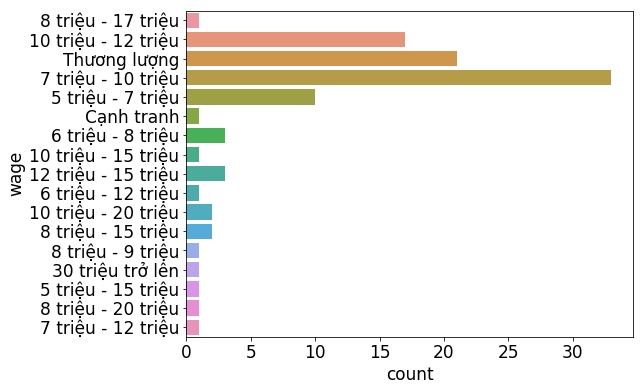

In [101]:
sns.countplot(y=local_data_topdev.head(100)['wage'])

In [103]:
# du lieu cua mywork
data_mywork.head()

,company,wage,skill,address,name,url
0,Công ty vàng bạc đá quý Bảo Tín Minh Châu,8 triệu - 17 triệu,Chứng khoán - Vàng,Ha Noi,Nhân viên thiết kế 2D-3D (Chuyên thiết kế tran...,https://mywork.com.vn/tuyen-dung/viec-lam/1089...
1,Công Ty TNHH In Ấn May Mặc Thời Trang Hùng Thiên,7 triệu - 10 triệu,Kiến trúc - Thiết kế nội thất,Ho Chi Minh,Thiết kế đồ họa - thiết kế hoa văn in trên vải,https://mywork.com.vn/tuyen-dung/viec-lam/1206...
2,Công ty Cổ phần Trực tuyến GOSU,7 triệu - 10 triệu,Thiết kế đồ họa - Web,Thua Thien Hue,Nhân viên Thiết kế,https://mywork.com.vn/tuyen-dung/viec-lam/1223...
3,Công Ty TNHH King Car,Thương lượng,Marketing - PR,Ho Chi Minh,Nhân viên Thiết kế đồ họa (Graphic Designer),https://mywork.com.vn/tuyen-dung/viec-lam/1228...
4,CÔNG TY TNHH DV TM TẦM NHÌN CHIẾN LƯỢC,Thương lượng,Thiết kế - Mỹ thuật,Ho Chi Minh,[HCM] Designer - Lương Hấp Dẫn,https://mywork.com.vn/tuyen-dung/viec-lam/1055...


In [104]:
data_mywork.describe()

,company,wage,skill,address,name,url
count,370,370,370,370,370,370
unique,292,37,29,18,301,370
top,Tập đoàn CNTT Truyền thông Quảng cáo Việt Tiến...,7 triệu - 10 triệu,Thiết kế đồ họa - Web,Ho Chi Minh,Nhân viên thiết kế,https://mywork.com.vn/tuyen-dung/viec-lam/1135...
freq,6,133,91,175,20,1


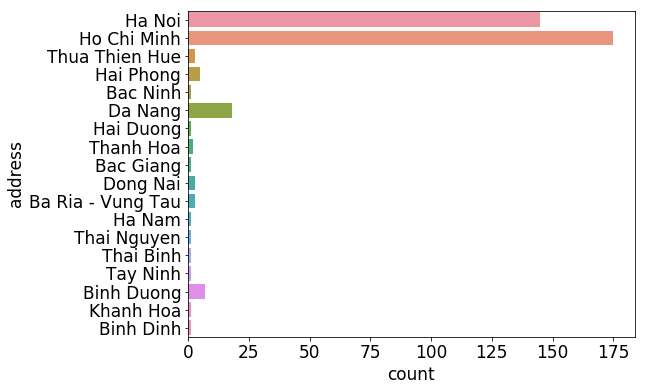

In [105]:
# phan bo viec lam cua mywork
sns.countplot(y=data_mywork['address'])

In [114]:
# thong ke data co skill la php cua mywork
skill_data_mywork = (result[result['skill'] == 'C++']).describe()
skill_data_mywork

,address,company,name,skill,url,wage
count,16,16,16,16,16,16
unique,2,15,15,1,16,5
top,Ho Chi Minh,ISB Vietnam Company,(HN) Software Engineer (C++),C++,https://topdev.vn/detail-jobs/hcm-game-develop...,Negotiable
freq,11,2,2,16,1,11


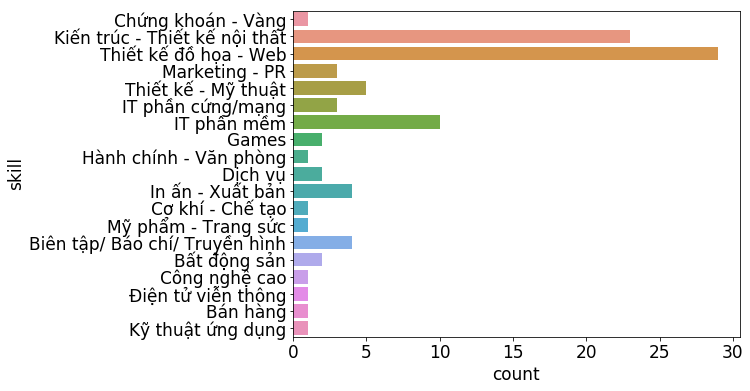

In [117]:
# thong ke 100 skill dau cua mywork
sns.countplot(y=data_mywork.head(100)['skill'])

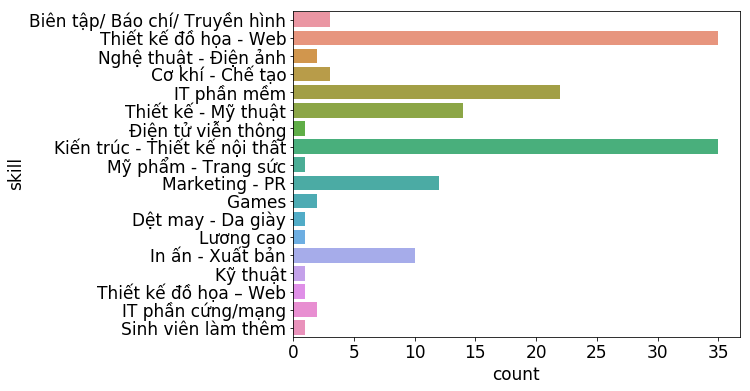

In [124]:
# thong ke 150 skill cuoi cua mywork
sns.countplot(y=data_mywork.tail(150)['skill'])

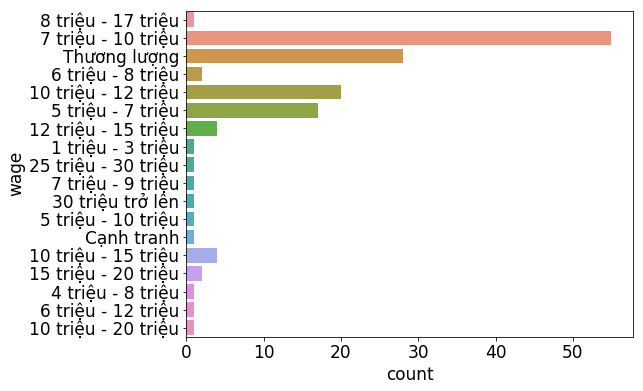

In [129]:
# thong ke 100 luong dau tien cua mywork
sns.countplot(y=data_mywork.head(150)['wage'])

In [130]:
data_mywork['wage'].describe()

count                    370
unique                    37
top       7 triệu - 10 triệu
freq                     133
Name: wage, dtype: object

In [131]:
data_mywork['skill'].describe()

count                       370
unique                       29
top       Thiết kế đồ họa - Web
freq                         91
Name: skill, dtype: object

In [132]:
data_mywork['address'].describe()

count             370
unique             18
top       Ho Chi Minh
freq              175
Name: address, dtype: object

In [133]:
data_mywork['company'].describe()

count                                                   370
unique                                                  292
top       Tập đoàn CNTT Truyền thông Quảng cáo Việt Tiến...
freq                                                      6
Name: company, dtype: object

In [134]:
# khu vuc Ha Noi cua mywork
local_data_mywork = (result[result['address'] == 'Ha Noi'])
local_data_mywork.describe()

,address,company,name,skill,url,wage
count,350,350,350,350,350,350
unique,1,274,310,58,350,54
top,Ha Noi,Tập đoàn CNTT Truyền thông Quảng cáo Việt Tiến...,Nhân viên thiết kế,Thiết kế đồ họa - Web,https://mywork.com.vn/tuyen-dung/viec-lam/1224...,Negotiable
freq,350,6,9,35,1,126


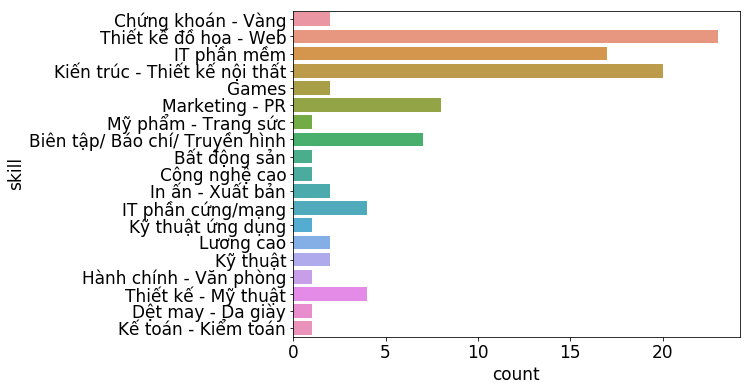

In [138]:
# thong ke 100 skill dau tien khu vuc Ha Noi cua mywork
sns.countplot(y=local_data_mywork.head(100)['skill'])

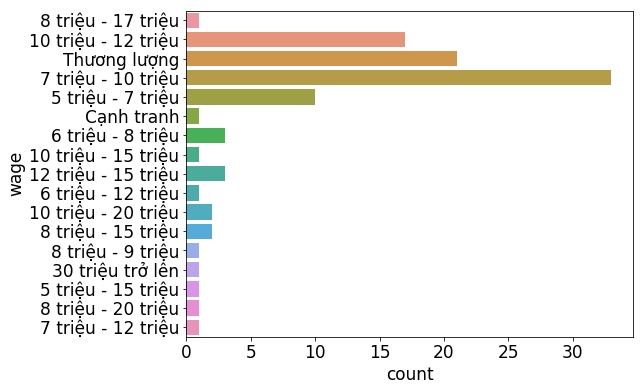

In [148]:
sns.countplot(y=local_data_mywork.head(100)['wage'])